In [1]:
import json
import numpy as np

In [2]:
JSON1_PATH = f'/media/daniel/data2/sentinel2/dataset/wallonie_grid.json'
JSON2_PATH = f'/media/daniel/data2/sentinel2/Wallonie/Wallonie_spring_2018/grid_features.json'

In [3]:
with open(JSON1_PATH, 'r') as f:
    grid1 = json.load(f)

with open(JSON2_PATH, 'r') as f:
    grid2 = json.load(f)

In [4]:
features1 = grid1['features']
features2 = grid2['features']

len(features1), len(features2)  

(1722, 1722)

In [8]:
features1[0]['id'], features2[0]['id'], features1[0] == features2[0]

('118,1242', '118,1242', True)

In [9]:
for i in range(len(features1)):
    if features1[i] != features2[i]:
        print(i)
        break

In [10]:
data_dir1 = '/media/daniel/data2/sentinel2/Wallonie/Wallonie_spring_2018/images_128'
prepend1 = "Wallonie_image_tile_"
data_dir2 = "/media/daniel/data2/sentinel2/Wallonie_SatlasSR/spring_2018/sr_images/"
prepend2 = ""

In [11]:
import tifffile
import matplotlib.pyplot as plt

In [15]:
idx = 0
x = 0
y = 0

img1 = tifffile.imread(f'{data_dir1}/{prepend1}{idx+1:04d}_{x}_{y}.tif')
img2 = tifffile.imread(f'{data_dir2}/{prepend2}{idx}_{x}_{y}.tif')
img1 = img1.transpose(1, 2, 0)
img2 = img2.transpose(1, 2, 0)

img1 = img1[:, :, [3, 2, 1]] / 10000

img1.shape, img2.shape

((128, 128, 3), (512, 512, 3))

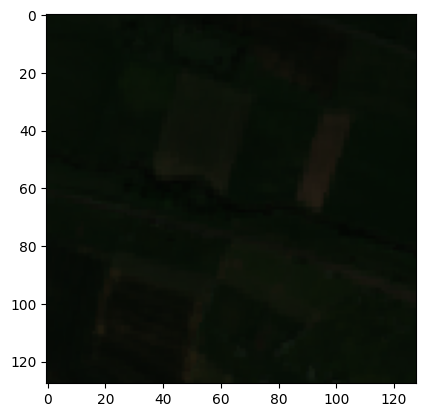

In [18]:
plt.imshow(img1)

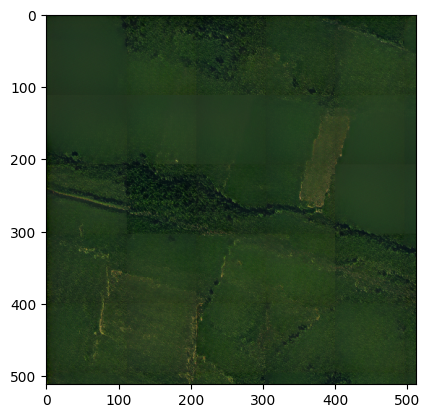

In [19]:
plt.imshow(img2)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
DATASET_PATH = "../../resources/datasets/a9ede607cb8d23d2101beb0fae2d661b"
os.path.exists(DATASET_PATH)

True

In [14]:
import re

def change_path(img_path):
    img_dir, img_name = os.path.split(img_path)

    ints = list(map(int, re.findall(r'\d+', img_name)))
    assert len(ints) == 3

    img_name = f'{ints[0]+1}_{ints[1]}_{ints[2]}.tif'
    
    return os.path.join(img_dir, img_name)

data = []

with open(f'{DATASET_PATH}/train.csv', 'r') as f:
    lines = f.readlines()
    
    data.append(lines[0])
    for l in lines[1:]:
        img, mask = l.split(',')
        new_img = change_path(img)
        new_mask = change_path(mask)

        data.append(f'{new_img},{new_mask}')
    
text = '\n'.join(data)

with open(f'{DATASET_PATH}/train2.csv', 'w') as f:
    f.write(text)

        

PermissionError: [Errno 13] Permission denied: '../../resources/datasets/a9ede607cb8d23d2101beb0fae2d661b/train2.csv'